In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
# Setting grid background color.
sns.set_style("dark", {"axes.facecolor": ".9"})
#sns.set_style('whitegrid')

In [5]:
# Importing data set. Suicide rate per country, year and gender.
male_female_suicide_rate = pd.read_csv('/Users/soul/Desktop/IronHack/VideoGame_Analysis/Data/Suicides/male-and-female-suicide-rate.csv')
male_female_suicide_rate.head()

,Entity,Code,Year,"Male suicide rate (age-adjusted male suicides per 100,000)","Female suicide rate (age-adjusted female suicides per 100,000)"
0,Afghanistan,AFG,2004,4.884804,8.630156
1,Albania,ALB,2004,9.330574,6.060875
2,Algeria,DZA,2004,5.145025,4.600765
3,Andorra,AND,2004,8.048293,2.902797
4,Angola,AGO,2004,21.472977,8.143820


In [6]:
# Grouping by year and limiting the results to the last 10 years available in the df.
# Calculating the mean to plot the difference in suicide rate for males and females.
mean_rate_fm = male_female_suicide_rate.groupby('Year').mean()
mean_rate_fm = mean_rate_fm.tail(10)

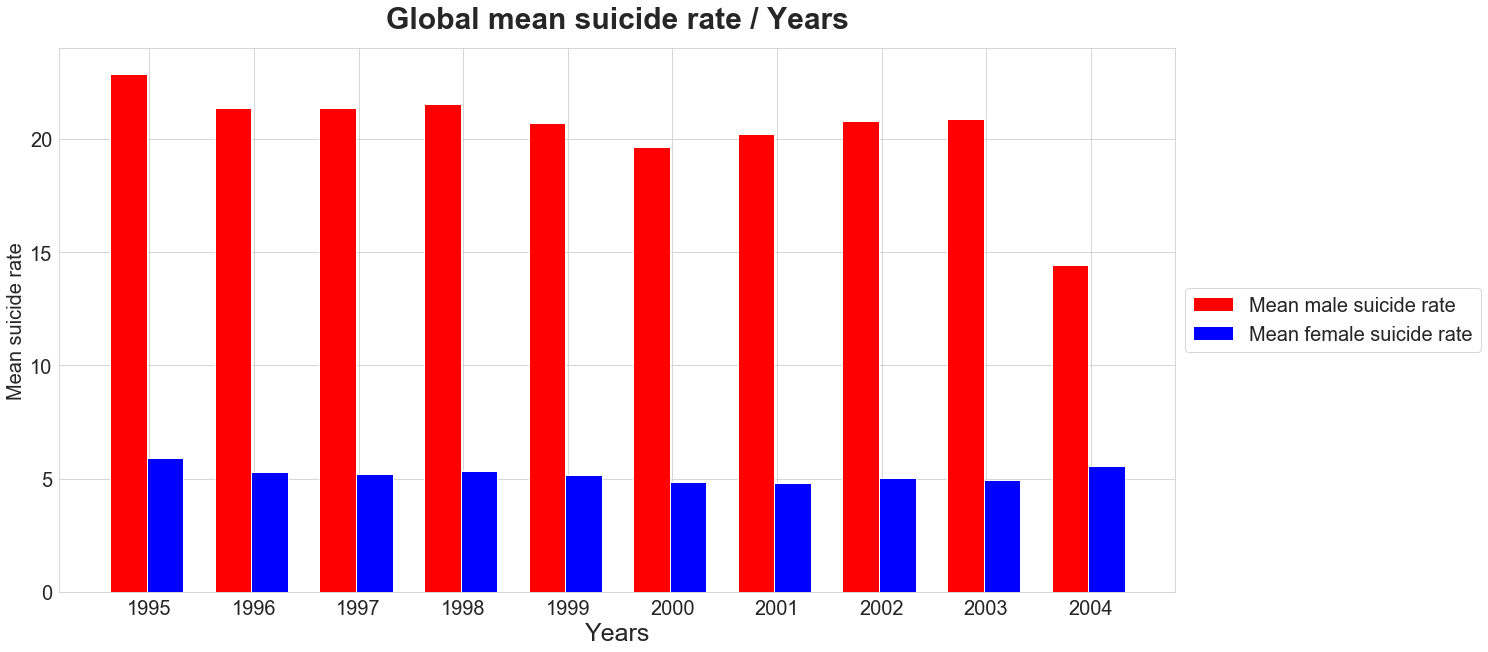

In [7]:
# Creating a subplot that will host our 2 bar plots.
# Each bar plot will represent the suicide rate of a gender through the years.
fig, ax = plt.subplots(figsize=(20,10))
index = np.arange(len(mean_rate_fm)) 
bar_width = 0.35
opacity = 0.8

# Males bar plot
males = plt.bar(index, mean_rate_fm['Male suicide rate (age-adjusted male suicides per 100,000)'],
                bar_width, color='r', 
                label='Mean male suicide rate', align='center')
# Females bar plot
females = plt.bar(index + bar_width, mean_rate_fm['Female suicide rate (age-adjusted female suicides per 100,000)'],
                 bar_width, color='b',
                 label= 'Mean female suicide rate')

# Setting all the labels, title, xticks and yticks, legend to the desired format
plt.xlabel('Years', fontsize=25)
plt.ylabel('Mean suicide rate', fontsize=20)
plt.title('Global mean suicide rate / Years', fontdict={'fontsize': 30, 'fontweight': 600}, pad=20)
plt.xticks(index +.2, (mean_rate_fm.index[:26]), fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.show()

In [8]:
# Importing data set. Suicide rate per country, year. Independent of gender.
suicide_rate_country = pd.read_csv('/Users/soul/Desktop/IronHack/VideoGame_Analysis/Data/Suicides/suicide-rates-by-country.csv')
suicide_rate_country.head()

,Entity,Code,Year,"suicide rate (age-adjusted suicides per 100,000 people)"
0,Afghanistan,AFG,2002,6.867054
1,Afghanistan,AFG,2004,6.684385
2,Afghanistan,AFG,2005,6.684385
3,Albania,ALB,2002,2.792918
4,Albania,ALB,2004,7.699330


In [14]:
# Extracting the first 10 countries with highest suicide rate from the last recorded year.
sorted_country_rates = suicide_rate_country.sort_values(
    by=['Year', 'suicide rate (age-adjusted suicides per 100,000 people)'], ascending=False)

plot_countries = []
# Since countries are sorted in descending fashion by year and suicide rate, we can take the first 10 in the list
# and they will be of the last recorded year and with the highest suicide rate.
for country in sorted_country_rates['Entity'][:11]:
    plot_countries.append(country)
    
sorted_country_rates.head()

# Not used because some of this countries only had entries for the last recorded years.

,Entity,Code,Year,"suicide rate (age-adjusted suicides per 100,000 people)"
1075,Guyana,GUY,2005,35.752872
1490,Lithuania,LTU,2005,33.341860
2181,Somalia,SOM,2005,29.864164
2290,Sri Lanka,LKA,2005,28.104046
2051,Russia,RUS,2005,27.874160


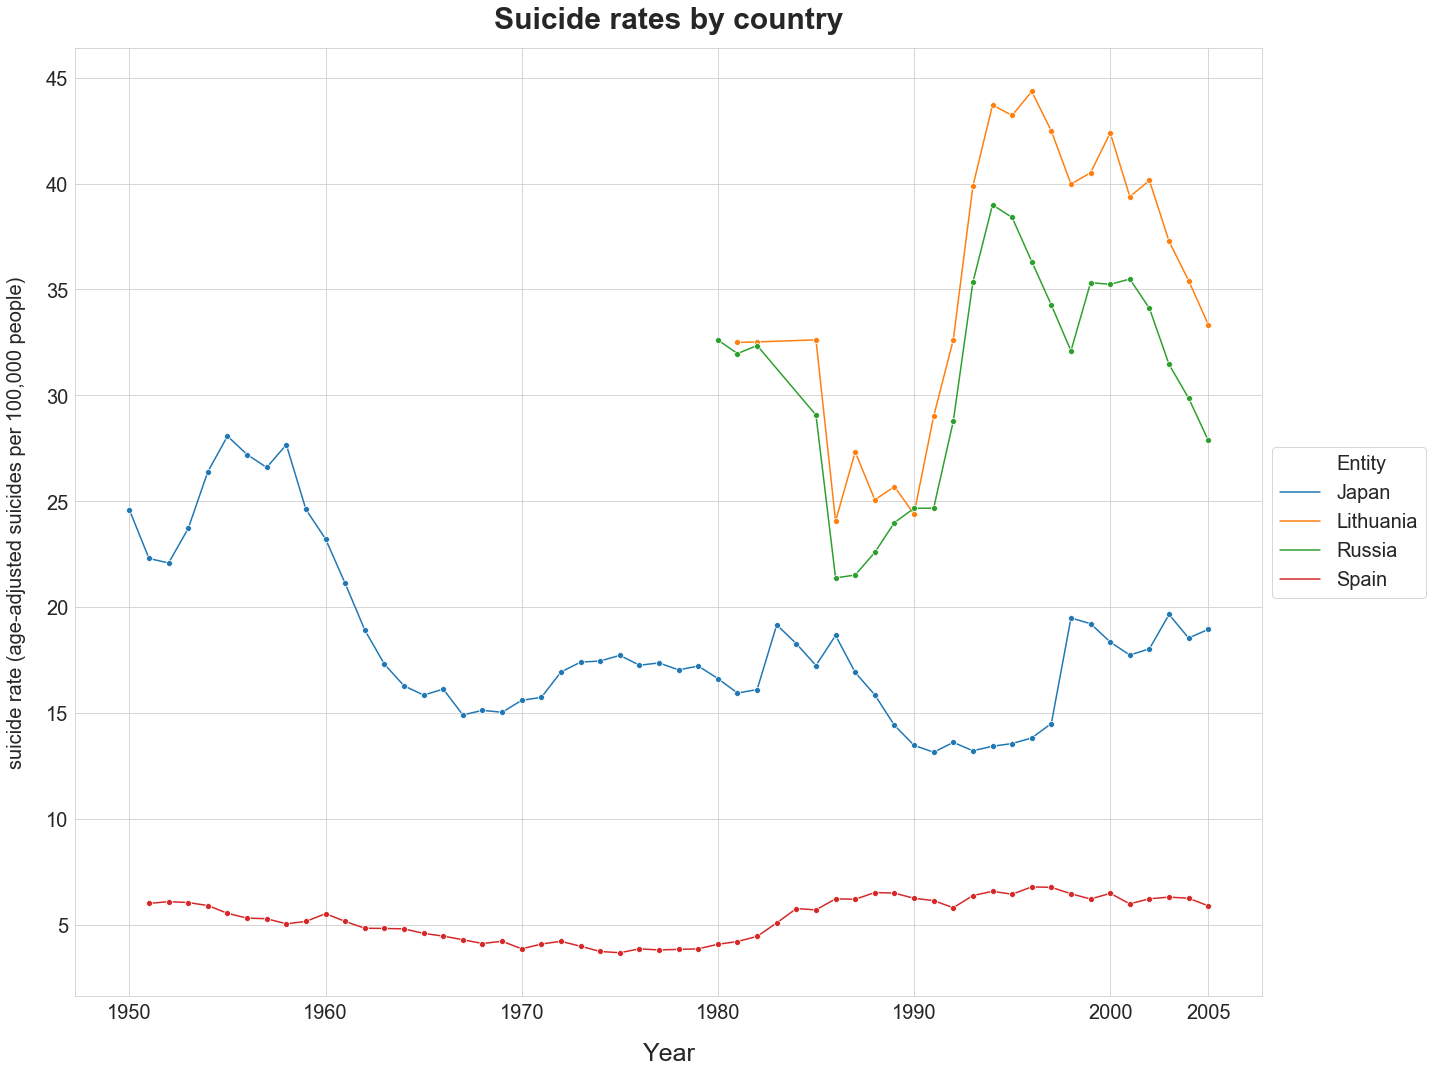

In [16]:
# Creating a subplot that will host plot.
# Each line will represent the evolution of the suicide rate over the years for each country.
# Plotting 4 countries for simplicity.

figure, ax = plt.subplots(1, 1, figsize=(20, 15))
m = suicide_rate_country[suicide_rate_country['Entity'].isin(['Spain', 'Russia', 'Lithuania', 'Japan'])]
sns.lineplot(x='Year', y='suicide rate (age-adjusted suicides per 100,000 people)', hue='Entity', data=m, linestyle = '--', marker='o')
ax.set(xticks=[1950, 1960, 1970, 1980, 1990, 2000, 2005])

# Setting all the labels, title, xticks and yticks, legend to the desired format
plt.xlabel('Year', fontsize=25, labelpad=20)
plt.ylabel('suicide rate (age-adjusted suicides per 100,000 people)', fontsize=20, labelpad=20)
plt.title('Suicide rates by country', fontdict={'fontsize': 30, 'fontweight': 600}, pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.tight_layout()
plt.show()



In [17]:
import geopandas as gpd
import os
%matplotlib inline

In [19]:
shapefile = os.path.expanduser('/Users/soul/Desktop/IronHack/VideoGame_Analysis/Data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

# Values will be binned and separated in as many colors as the scalar we assign this variable.
colors = 9

# cmap refers to the range of colors our bins will take.
cmap = 'Blues'
figsize = (30, 10)
year = '2005'
title = 'Suicide rates by country in {}'.format(year)


In [20]:
# Creating a GeoDataFrame.
# ADM0_A3 --> Contains the countries codes.
# geometry --> Contains the polygonal shapes that'll be used to draw our countries.
# A CRS tells Python how those coordinates are related to places on the Earth.
# +proj=robin --> We're telling which map projection, i.e. form, we're going to use.
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)

,ADM0_A3,geometry
226,IOT,(POLYGON ((6827957.007327407 -789720.580673838...
205,VIR,(POLYGON ((-6013368.81581185 1898566.623081705...
221,GGY,(POLYGON ((-212315.0348398002 5274456.15964288...
44,LTU,(POLYGON ((2086220.069786733 5905626.959598475...
209,VGB,(POLYGON ((-6013969.376291451 1968501.15015511...


In [22]:
# Merging our suicide rates df with our GeoDataFrame on the country codes, so we have all the information
# necessary to draw a map in a single df.
merged = gdf.merge(suicide_rate_country, left_on='ADM0_A3', right_on='Code')
merged.head()

,ADM0_A3,geometry,Entity,Code,Year,"suicide rate (age-adjusted suicides per 100,000 people)"
0,IDN,(POLYGON ((11108970.26020776 445285.1302330397...,Indonesia,IDN,2002,12.203690
1,IDN,(POLYGON ((11108970.26020776 445285.1302330397...,Indonesia,IDN,2004,11.396111
2,IDN,(POLYGON ((11108970.26020776 445285.1302330397...,Indonesia,IDN,2005,11.396111
3,MYS,(POLYGON ((11108970.26020776 445285.1302330397...,Malaysia,MYS,2002,7.963536
4,MYS,(POLYGON ((11108970.26020776 445285.1302330397...,Malaysia,MYS,2004,8.211067


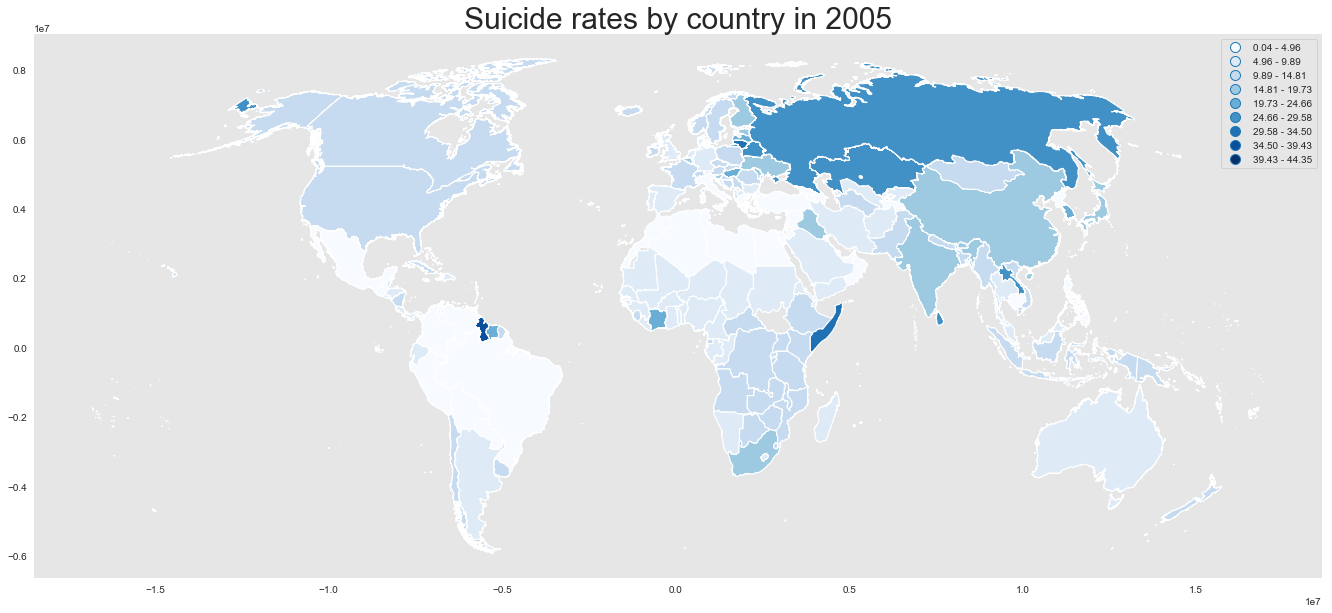

In [28]:
# From uf GeoDataFrame and with the plot function we can get our world map
# with different colors, depending on the suicide rate.
# Droping the NaN values resulting of the merge first.
# column --> Values from our GeoDataFrame we want to represent in the map.
# cmap --> Colormap we're going to use.
# scheme --> Setting it to 'equal_interval' so we can have a transition in the color depending on the values.
# k --> How many color intensities we'll have, also depending on the value each country has.
ax = merged.dropna().plot(column='suicide rate (age-adjusted suicides per 100,000 people)',
                          cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

# Removing figure bars and setting a title.
sns.despine(top=True, bottom=True, right=True, left=True)
ax.set_title(title, fontdict={'fontsize': 30}, loc='center')

plt.show()